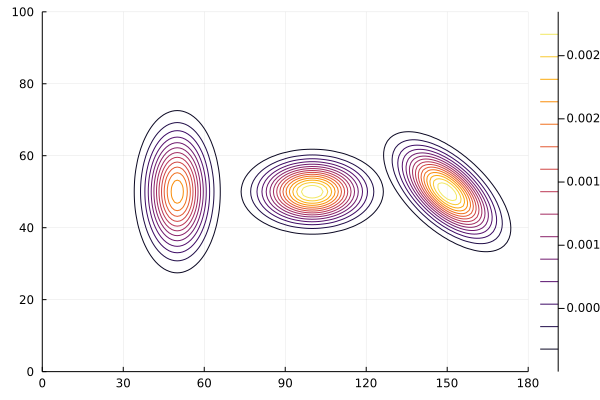

In [156]:
a = MvNormal([50, 50], [50 0; 0 100])
b = MvNormal([100, 50], [125 0; 0 25])
c = MvNormal([150, 50], [100 -25*3^(1/2); -25*3^(1/2) 50])

x_data = collect(0:180)
y_data = collect(0:100)

za_data = [pdf(a,[x,y]) for y in y_data, x in x_data]
plot(x_data, y_data, za_data) # 2D

zb_data = [pdf(b,[x,y]) for y in y_data, x in x_data]
plot!(x_data, y_data, zb_data) # 2D

zc_data = [pdf(c,[x,y]) for y in y_data, x in x_data]
plot!(x_data, y_data, zc_data) # 2D

In [163]:
using LinearAlgebra

eig_vals, eig_vec = eigen(c.Σ)

println("eig_vals: ", eig_vals)
println("eig_vec: ", eig_vec)
println("固有ベクトル1: ", eig_vec[:, 1])
println("固有ベクトル2: ", eig_vec[:, 2])

eig_vals: [25.0, 125.0]
eig_vec: [-0.5 -0.8660254037844387; -0.8660254037844387 0.5]
固有ベクトル1: [-0.5, -0.8660254037844387]
固有ベクトル2: [-0.8660254037844387, 0.5]


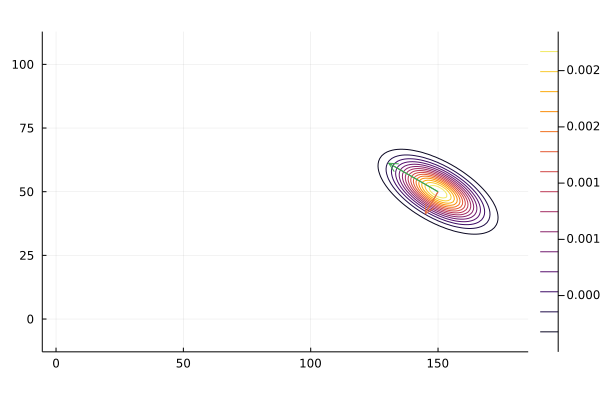

In [169]:
zc_data = [pdf(c,[x,y]) for y in y_data, x in x_data]
plot(x_data, y_data, zc_data, aspect_ratio=:equal)

v = 2*(eig_vals[1])^(1/2)*eig_vec[:, 1]
quiver!([c.μ[1]], [c.μ[2]], quiver=([v[1]], [v[2]]))

v = 2*(eig_vals[2])^(1/2)*eig_vec[:, 2]
quiver!([c.μ[1]], [c.μ[2]], quiver=([v[1]], [v[2]]))

In [174]:
V = deepcopy(eig_vec)
L = diagm(0=>eig_vals)

println("分解したものを計算: ", V*L*inv(V))
println("元の共分散行列: ", [100 -25*3^(1/2); -25*3^(1/2) 50])

分解したものを計算: [100.00000000000001 -43.30127018922194; -43.30127018922194 50.0]
元の共分散行列: [100.0 -43.30127018922193; -43.30127018922193 50.0]
